# Feature vectorization and questions&answers

In [9]:
import numpy as np
import random

def generate_random_person():
    person = {}
    #hour = random.randint(21, 23)
    #minute = random.choice(["00", "15", "30", "45"])
    person["Uyku Saati"] = random.choice(["21:00", "21:15", "21:30", "21:45", "22:00", "22:15", "22:30", "22:45", "23:00", "23:15", "23:30", "23:45", "00:00", "00:15", "00:30", "00:45", "01:00", "01:15", "01:30", "01:45", "02:00", "02:15", "02:30", "02:45", "03:00", "03:15", "03:30", "03:45", "04:00", "04:15", "04:30", "04:45", "05:00"]) 
    # 33 numbers of different sleep time
    #person["Uyku Saati"] = f"{hour}:{minute}"
    person["Ortalama"] = round(random.uniform(1.0, 4.0), 2)
    person["Sigara Kullanımı"] = random.choice(["evet", "hayır"])
    person["Evcil Hayvan"] = random.choice(["evet", "hayır"])
    person["Lüks Önemi"] = random.randint(1, 10)
    person["Kira Süresi"] = random.randint(2, 20)
    person["Fiyat Aralığı"] = random.randint(1000, 5000)
    return person

def get_person_answers(person):
    answers = {}
    answers["Soru 1: Genelde kaçta uyursun?"] = person["Uyku Saati"]
    answers["Soru 2: Ortalaman kaç?"] = person["Ortalama"]
    answers["Soru 3: Sigara kullanıyor musun?"] = person["Sigara Kullanımı"]
    answers["Soru 4: Evcil hayvanın var mı?"] = person["Evcil Hayvan"]
    answers["Soru 5: Evinizin lüks olması ne kadar önemli?"] = person["Lüks Önemi"]
    answers["Soru 6: Evi kaç aylığına kiralamak istiyorsunuz?"] = person["Kira Süresi"]
    answers["Soru 7: Fiyat aralığınız nedir?"] = person["Fiyat Aralığı"]
    return answers

###########################################
def create_feature_vector(answers): # creates feature vector from certain answer dictionary
    feature_vector = np.zeros(39) # comes from the questions 32 sleep
    # 1 gpa 1 smoking 1 pet 1 luxury 1 rent duration 1 price
    
    # Genelde kaçta uyursun?
    ''' wrong because minute information 
    sleep_time = answers["Soru 1: Genelde kaçta uyursun?"]
    index = int(sleep_time[:2]) - 21 #04.30
    feature_vector[index] = 1
    '''
    sleep_time = answers["Soru 1: Genelde kaçta uyursun?"]
    hour = int(sleep_time[:2])
    minute = int(sleep_time[3:])
    if "0" in str(hour) or len(str(hour)) == 1:
        hour += 24
    index = int((hour - 21) * 4 + minute / 15) #4 means 21 -- 22 difference it should jump to 4 index after
    feature_vector[index] = 1
    
    # Ortalaman kaç?
    average = answers["Soru 2: Ortalaman kaç?"]
    feature_vector[33] = average
    
    # Sigara kullanıyor musun?
    smoking = answers["Soru 3: Sigara kullanıyor musun?"]
    feature_vector[34] = 1 if smoking == "evet" else 0
    
    # Evcil hayvanın var mı?
    pet = answers["Soru 4: Evcil hayvanın var mı?"]
    feature_vector[35] = 1 if pet == "evet" else 0
    
    # Evinizin lüks olması ne kadar önemli?
    luxury = answers["Soru 5: Evinizin lüks olması ne kadar önemli?"]
    feature_vector[36] = luxury
    
    # Evi kaç aylığına kiralamak istiyorsunuz?
    lease_duration = answers["Soru 6: Evi kaç aylığına kiralamak istiyorsunuz?"]
    feature_vector[37] = lease_duration
    
    # Fiyat aralığınız nedir?
    price_range = answers["Soru 7: Fiyat aralığınız nedir?"]
    feature_vector[38] = price_range
    
    return feature_vector

answers_list = [] # stores answers which all are dictionaries
# 1000 kişi için otomatik olarak cevaplar oluşturan kod
for _ in range(2000):
    person = generate_random_person()
    #hour = random.randint(0, 4)
    #minute = random.choice(["00", "15", "30", "45"])
    #person["Uyku Saati"] = f"{hour:02d}:{minute}"
    answers = get_person_answers(person)
    answers_list.append(answers)
    for question, answer in answers.items(): # This part just prints the questions and answers
        print(question)
        print("Cevap: ", answer)
    print("==============================")

# So far we created 10000 person and their different personalities    

#print(answers_list)

# Örnek bir kişi için özellik vektörünü oluşturma
person = {
    "Soru 1: Genelde kaçta uyursun?": "21:00",
    "Soru 2: Ortalaman kaç?": 3.5,
    "Soru 3: Sigara kullanıyor musun?": "hayır",
    "Soru 4: Evcil hayvanın var mı?": "evet",
    "Soru 5: Evinizin lüks olması ne kadar önemli?": 8,
    "Soru 6: Evi kaç aylığına kiralamak istiyorsunuz?": 12,
    "Soru 7: Fiyat aralığınız nedir?": 3000
}

# creating feature_vectors for which all of the answers

feature_vector_list = []
for answer in answers_list:
    feature_vector = create_feature_vector(answer)
    feature_vector = feature_vector.astype(int)
    feature_vector_list.append(feature_vector)
    print("Özellik vektörü:", feature_vector)
print(feature_vector_list)

'''
feature_vector -> [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    1    0    0    0    0    0    0
    0    0    0    0    2    1    1    8   12 2836]  -> first 32 hours // question2 // question3 // goes like this // ...
'''


Soru 1: Genelde kaçta uyursun?
Cevap:  01:15
Soru 2: Ortalaman kaç?
Cevap:  3.12
Soru 3: Sigara kullanıyor musun?
Cevap:  evet
Soru 4: Evcil hayvanın var mı?
Cevap:  evet
Soru 5: Evinizin lüks olması ne kadar önemli?
Cevap:  10
Soru 6: Evi kaç aylığına kiralamak istiyorsunuz?
Cevap:  2
Soru 7: Fiyat aralığınız nedir?
Cevap:  1764
Soru 1: Genelde kaçta uyursun?
Cevap:  00:30
Soru 2: Ortalaman kaç?
Cevap:  1.04
Soru 3: Sigara kullanıyor musun?
Cevap:  hayır
Soru 4: Evcil hayvanın var mı?
Cevap:  evet
Soru 5: Evinizin lüks olması ne kadar önemli?
Cevap:  5
Soru 6: Evi kaç aylığına kiralamak istiyorsunuz?
Cevap:  17
Soru 7: Fiyat aralığınız nedir?
Cevap:  3216
Soru 1: Genelde kaçta uyursun?
Cevap:  02:00
Soru 2: Ortalaman kaç?
Cevap:  1.11
Soru 3: Sigara kullanıyor musun?
Cevap:  evet
Soru 4: Evcil hayvanın var mı?
Cevap:  evet
Soru 5: Evinizin lüks olması ne kadar önemli?
Cevap:  4
Soru 6: Evi kaç aylığına kiralamak istiyorsunuz?
Cevap:  11
Soru 7: Fiyat aralığınız nedir?
Cevap:  3274
Sor

'\nfeature_vector -> [   0    0    0    0    0    0    0    0    0    0    0    0    0    0\n    0    0    0    0    0    0    0    1    0    0    0    0    0    0\n    0    0    0    0    2    1    1    8   12 2836]  -> first 32 hours // question2 // question3 // goes like this // ...\n'

In [5]:
answers_list

[{'Soru 1: Genelde kaçta uyursun?': '03:45',
  'Soru 2: Ortalaman kaç?': 1.96,
  'Soru 3: Sigara kullanıyor musun?': 'hayır',
  'Soru 4: Evcil hayvanın var mı?': 'hayır',
  'Soru 5: Evinizin lüks olması ne kadar önemli?': 6,
  'Soru 6: Evi kaç aylığına kiralamak istiyorsunuz?': 11,
  'Soru 7: Fiyat aralığınız nedir?': 4036},
 {'Soru 1: Genelde kaçta uyursun?': '05:00',
  'Soru 2: Ortalaman kaç?': 3.87,
  'Soru 3: Sigara kullanıyor musun?': 'hayır',
  'Soru 4: Evcil hayvanın var mı?': 'hayır',
  'Soru 5: Evinizin lüks olması ne kadar önemli?': 3,
  'Soru 6: Evi kaç aylığına kiralamak istiyorsunuz?': 6,
  'Soru 7: Fiyat aralığınız nedir?': 1476},
 {'Soru 1: Genelde kaçta uyursun?': '22:15',
  'Soru 2: Ortalaman kaç?': 3.78,
  'Soru 3: Sigara kullanıyor musun?': 'evet',
  'Soru 4: Evcil hayvanın var mı?': 'hayır',
  'Soru 5: Evinizin lüks olması ne kadar önemli?': 10,
  'Soru 6: Evi kaç aylığına kiralamak istiyorsunuz?': 10,
  'Soru 7: Fiyat aralığınız nedir?': 1873},
 {'Soru 1: Genelde k

# Clustering classes according to questions&answers

In [11]:
from sklearn.cluster import KMeans

# importing data set
X = feature_vector_list

# K-means clustering
kmeans = KMeans(n_clusters=5) # we have 5 classes 
kmeans.fit(X)

# take the clusters
clusters = kmeans.labels_

# converting clusters to class labels
class_labels = {0: "Long Term", 1: "Short Term", 2: "Chill", 3: "Lux Care", 4: "High Mark"}
predicted_labels = [class_labels[cluster] for cluster in clusters]

In [78]:
predicted_labels

['Chill',
 'Lux Care',
 'Chill',
 'Long Term',
 'Chill',
 'Lux Care',
 'Lux Care',
 'Chill',
 'Short Term',
 'High Mark',
 'Lux Care',
 'Short Term',
 'Lux Care',
 'High Mark',
 'Lux Care',
 'Chill',
 'Chill',
 'Chill',
 'Lux Care',
 'Short Term',
 'Short Term',
 'High Mark',
 'Short Term',
 'Short Term',
 'Lux Care',
 'Chill',
 'Chill',
 'Lux Care',
 'Lux Care',
 'High Mark',
 'Chill',
 'Short Term',
 'Short Term',
 'Short Term',
 'Lux Care',
 'Long Term',
 'Chill',
 'High Mark',
 'Lux Care',
 'Long Term',
 'High Mark',
 'Short Term',
 'Short Term',
 'High Mark',
 'Short Term',
 'Chill',
 'Lux Care',
 'High Mark',
 'High Mark',
 'Long Term',
 'High Mark',
 'High Mark',
 'High Mark',
 'Short Term',
 'High Mark',
 'Long Term',
 'Lux Care',
 'Chill',
 'Long Term',
 'Short Term',
 'Lux Care',
 'Long Term',
 'Long Term',
 'Long Term',
 'Lux Care',
 'Short Term',
 'Lux Care',
 'Short Term',
 'Lux Care',
 'Long Term',
 'Long Term',
 'Short Term',
 'Lux Care',
 'Short Term',
 'Chill',
 'Lux C

# Trying other clustering algorithms

# AgglomerativeClustering

In [13]:
from sklearn.cluster import AgglomerativeClustering # Use this for now

# Veri setini yükleme
X = feature_vector_list

# Hiyerarşik Kümeleme modelini uygulama
clustering = AgglomerativeClustering(n_clusters=5)
clustering.fit(X)

# Küme etiketlerini al
cluster_labels = clustering.labels_

# Küme etiketlerini sınıf etiketlerine dönüştürme
class_labels = {0: "Long Term", 1: "Short Term", 2: "Chill", 3: "Lux Care", 4: "High Mark"}
predicted_labels = [class_labels[label] for label in cluster_labels]

In [14]:
cluster_labels

array([2, 4, 4, ..., 3, 2, 0], dtype=int64)

In [80]:
predicted_labels

['Long Term',
 'High Mark',
 'Short Term',
 'Short Term',
 'Long Term',
 'High Mark',
 'Chill',
 'Short Term',
 'Chill',
 'Lux Care',
 'Chill',
 'Long Term',
 'Chill',
 'Lux Care',
 'High Mark',
 'Short Term',
 'Long Term',
 'Long Term',
 'Chill',
 'Chill',
 'Long Term',
 'Lux Care',
 'Long Term',
 'Long Term',
 'Chill',
 'Long Term',
 'Long Term',
 'Chill',
 'High Mark',
 'Lux Care',
 'Short Term',
 'Chill',
 'Chill',
 'Chill',
 'High Mark',
 'Short Term',
 'Long Term',
 'Lux Care',
 'High Mark',
 'Short Term',
 'Lux Care',
 'Long Term',
 'Long Term',
 'Lux Care',
 'Chill',
 'Long Term',
 'High Mark',
 'Lux Care',
 'Lux Care',
 'Short Term',
 'Lux Care',
 'Lux Care',
 'Lux Care',
 'Long Term',
 'Lux Care',
 'Short Term',
 'High Mark',
 'Long Term',
 'Short Term',
 'Chill',
 'Chill',
 'Short Term',
 'Short Term',
 'Short Term',
 'Chill',
 'Chill',
 'High Mark',
 'Chill',
 'High Mark',
 'Short Term',
 'Short Term',
 'Chill',
 'High Mark',
 'Long Term',
 'Long Term',
 'Chill',
 'Chill',


# GaussianMixture 

In [15]:
from sklearn.mixture import GaussianMixture

# Veri setini yükleme veya oluşturma
# X: Özellik vektörleri
X = feature_vector_list
# GMM modelini oluşturma
gmm = GaussianMixture(n_components=5)  # 5 küme oluşturmak için

# GMM modelini veriye uydurma
gmm.fit(X)

# Veri noktalarının kümelere atanması
labels = gmm.predict(X)
#labels
# Elde edilen küme etiketlerini kullanma
# İşlemler, küme analizi, görselleştirme vb.
class_labels = {0: "Long Term", 1: "Short Term", 2: "Chill", 3: "Lux Care", 4: "High Mark"}
predicted_labels = [class_labels[label] for label in labels]

In [16]:
labels

array([1, 3, 2, ..., 1, 4, 1], dtype=int64)

In [8]:
predicted_labels

['Chill',
 'Short Term',
 'Lux Care',
 'High Mark',
 'Lux Care',
 'High Mark',
 'High Mark',
 'High Mark',
 'Long Term',
 'Short Term',
 'High Mark',
 'Lux Care',
 'Short Term',
 'Lux Care',
 'Long Term',
 'Long Term',
 'Chill',
 'Chill',
 'Long Term',
 'Lux Care',
 'Lux Care',
 'Lux Care',
 'Lux Care',
 'Lux Care',
 'High Mark',
 'Lux Care',
 'High Mark',
 'Chill',
 'Long Term',
 'Long Term',
 'Long Term',
 'High Mark',
 'Chill',
 'High Mark',
 'High Mark',
 'Long Term',
 'High Mark',
 'High Mark',
 'Short Term',
 'Long Term',
 'Chill',
 'High Mark',
 'Short Term',
 'High Mark',
 'High Mark',
 'High Mark',
 'Long Term',
 'Chill',
 'Lux Care',
 'Long Term',
 'Lux Care',
 'Long Term',
 'Long Term',
 'Short Term',
 'High Mark',
 'Long Term',
 'Lux Care',
 'High Mark',
 'Chill',
 'Lux Care',
 'Lux Care',
 'Chill',
 'Lux Care',
 'High Mark',
 'High Mark',
 'Long Term',
 'Long Term',
 'Long Term',
 'Short Term',
 'High Mark',
 'Long Term',
 'High Mark',
 'High Mark',
 'Lux Care',
 'Long Ter

# Model SVC

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Veri setini hazırlama
X = feature_vector_list
y = clusters     # KMEANS --> y=clusters && AgglomerativeClustering --> y=cluster_labels && GaussianMixture --> y=labels

# Veri setini eğitim ve test seti olarak bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sınıflandırma modelini seçme (örneğin, Support Vector Machine)
model = SVC()

# Modeli eğitme
model.fit(X_train, y_train)

# Modeli test verileriyle değerlendirme
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)



Model accuracy: 0.995


In [123]:
y

array([4, 0, 4, ..., 1, 3, 1])

In [126]:
unique_y = np.unique(y)
unique_y

array([0, 1, 2, 3, 4])

# Other Models

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Öznitelik vektörleri
X = feature_vector_list

# Sınıflandırmalar
y = clusters

# Karar ağacı modelini oluşturma
model = DecisionTreeClassifier()

# Modeli eğitme
model.fit(X, y)

# Eğitilmiş modelle tahmin yapma
predictions = model.predict(X)


# Tahminleri görüntüleme
for i, prediction in enumerate(predictions):
    print(f"Öznitelik vektörü {i+1}: {X[i]}")
    print(f"Sınıflandırma tahmini: {prediction}")
    print("==============================")



'''
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)
'''

Öznitelik vektörü 1: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    3    1    1   10    2 1764]
Sınıflandırma tahmini: 3
Öznitelik vektörü 2: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    1    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    1    0    1    5   17 3216]
Sınıflandırma tahmini: 4
Öznitelik vektörü 3: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    1    0    0    0    0    0    0    0
    0    0    0    0    0    1    1    1    4   11 3274]
Sınıflandırma tahmini: 4
Öznitelik vektörü 4: [   0    0    1    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    1    1    0    4   18 2734]
Sınıflandırma tahmini: 4
Öznitelik vektörü 5:

'\ny_pred = model.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint("Model accuracy:", accuracy)\n'

# Model predict

In [110]:
new_feature_predict_vector = np.array([ 0,    0,    0,    0,    0,    0,    0,    0,    0,    1,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,    0,    1,    4,   15, 6000])
new_feature_predict_vector = new_feature_predict_vector.astype(int).reshape(1,-1)

In [111]:
# Yeni feature vectorler için sınıf tahmini yapma
y_pred_new = model.predict(new_feature_predict_vector)
y_pred_new #4 HIGH MARK

array([4])

# Model deployment

In [112]:
import joblib

# Modeli kaydetme
joblib.dump(model, 'svc_model.pkl')


['svc_model.pkl']

In [113]:
# Modeli yükleme
model = joblib.load('svc_model.pkl')

# Yeni feature vectorler için sınıf tahmini yapma
y_pred = model.predict(new_feature_predict_vector)
y_pred

array([4])

# Data Visualization

In [206]:
from collections import Counter

liste = predicted_labels

tekrar_sayisi = Counter(liste)
class_counts = {label: 0 for label in class_labels.values()}
for deger, sayi in tekrar_sayisi.items():
    class_counts[deger] = sayi
class_cp

{'Long Term': 390,
 'Short Term': 396,
 'Chill': 420,
 'Lux Care': 398,
 'High Mark': 396}

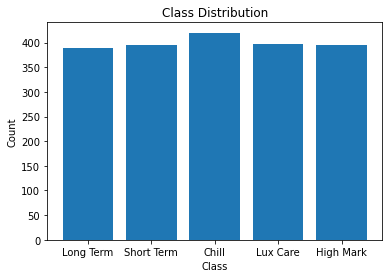

In [209]:
import matplotlib.pyplot as plt
from collections import Counter

class_labels = {
    1: "Long Term",
    2: "Short Term",
    3: "Chill",
    4: "Lux Care",
    5: "High Mark"
}
liste = predicted_labels
tekrar_sayisi = Counter(liste)
class_counts = {label: 0 for label in class_labels.values()}

for deger, sayi in tekrar_sayisi.items():
    class_counts[deger] = sayi
# Sınıf dağılımını bar grafik olarak çizin
plt.bar(class_names, class_counts.values())
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

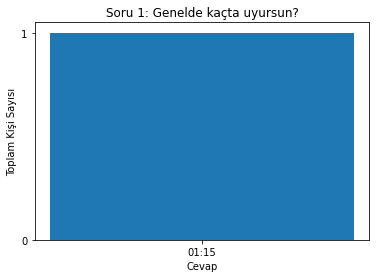

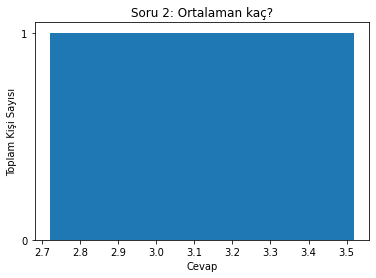

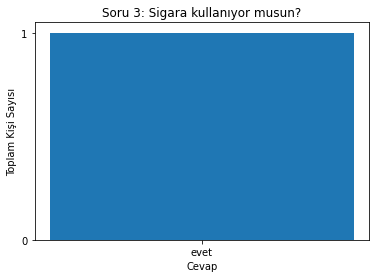

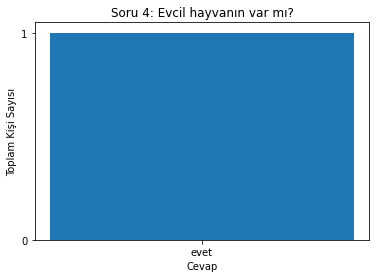

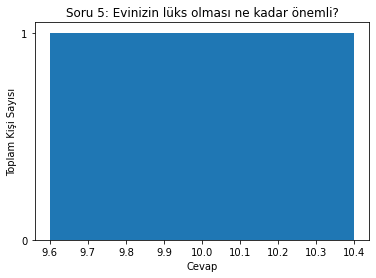

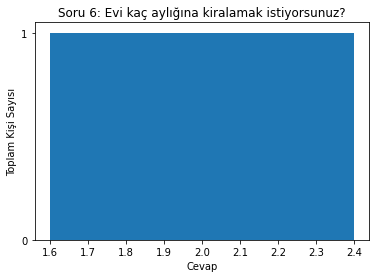

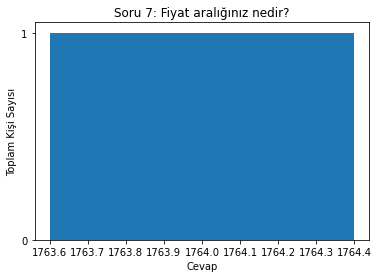

In [26]:
import matplotlib.pyplot as plt

# Sorular ve cevaplar
sorular = ["Soru 1: Genelde kaçta uyursun?",
           "Soru 2: Ortalaman kaç?",
           "Soru 3: Sigara kullanıyor musun?",
           "Soru 4: Evcil hayvanın var mı?",
           "Soru 5: Evinizin lüks olması ne kadar önemli?",
           "Soru 6: Evi kaç aylığına kiralamak istiyorsunuz?",
           "Soru 7: Fiyat aralığınız nedir?"]

cevaplar = [("01:15", 3.12, "evet", "evet", 10, 2, 1764),
            # Diğer cevaplar buraya eklenebilir
            ]

# Grafik oluşturma
for i, soru in enumerate(sorular):
    cevap_listesi = [cevap[i] for cevap in cevaplar]
    unique_cevaplar = list(set(cevap_listesi))
    toplam_kisi_sayisi = [cevap_listesi.count(cevap) for cevap in unique_cevaplar]

    fig, ax = plt.subplots()
    ax.bar(unique_cevaplar, toplam_kisi_sayisi)
    ax.set_xlabel("Cevap")
    ax.set_ylabel("Toplam Kişi Sayısı")
    ax.set_title(soru)

    # Yükseklik değerlerini tam sayılara dönüştürme
    ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

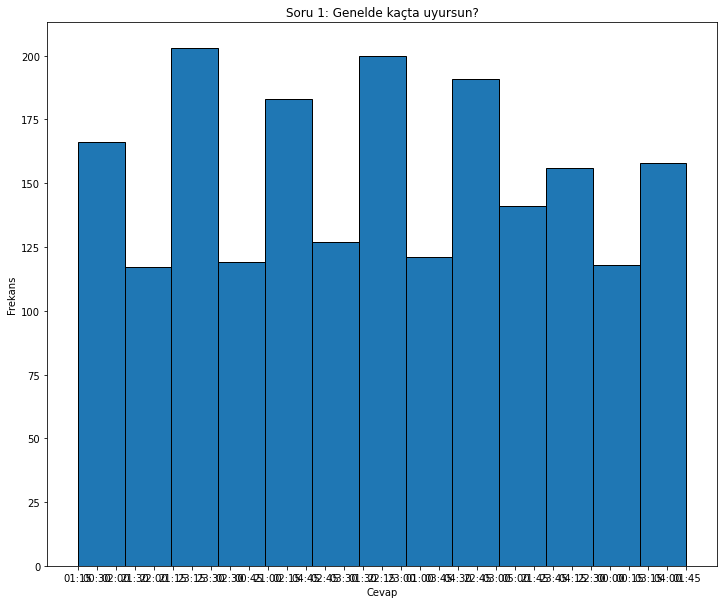

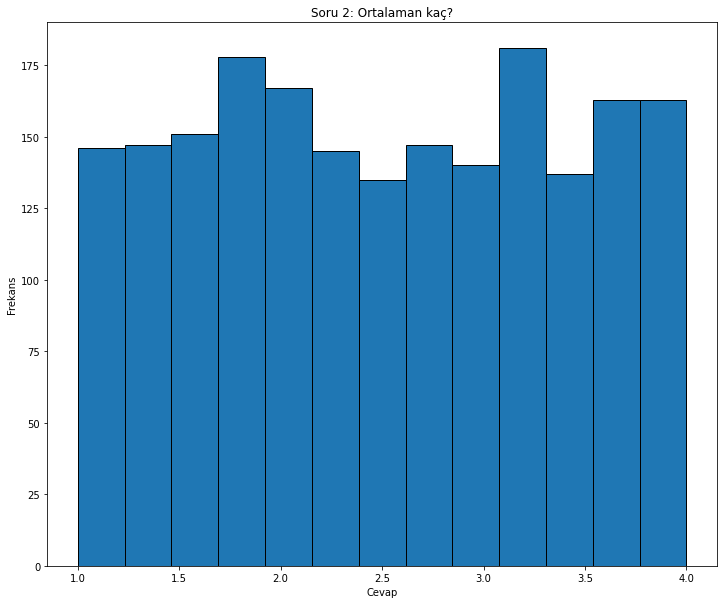

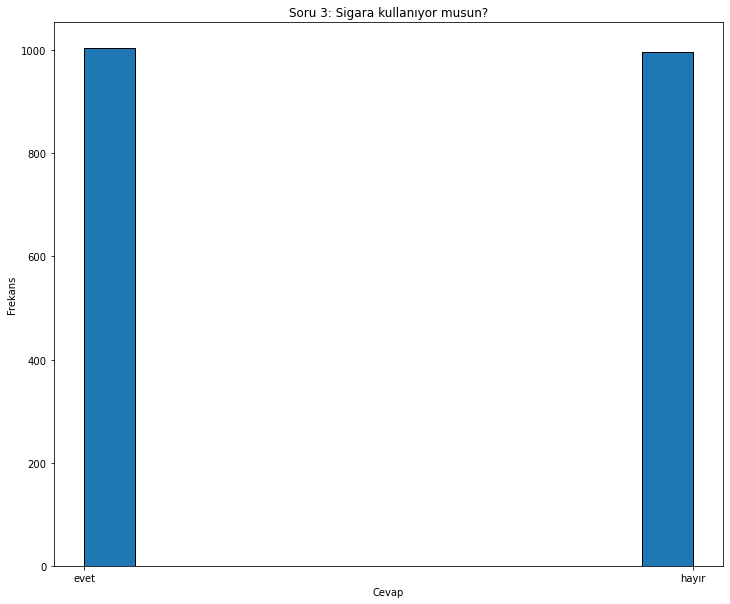

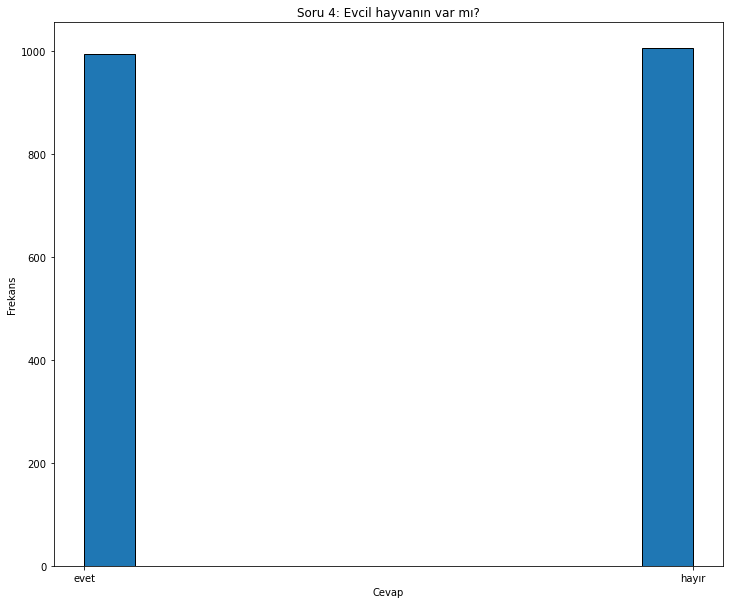

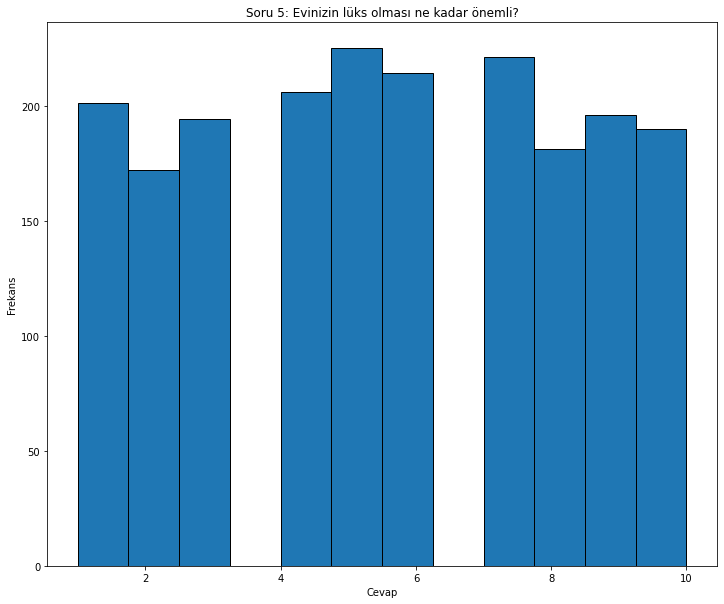

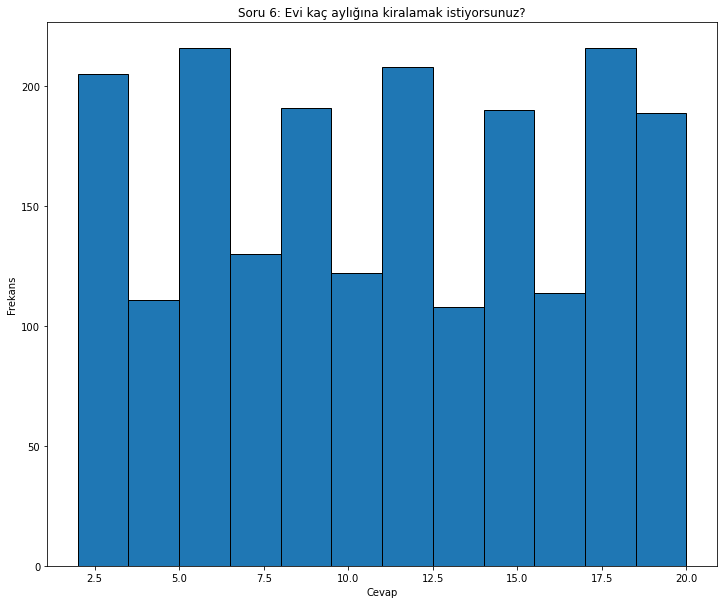

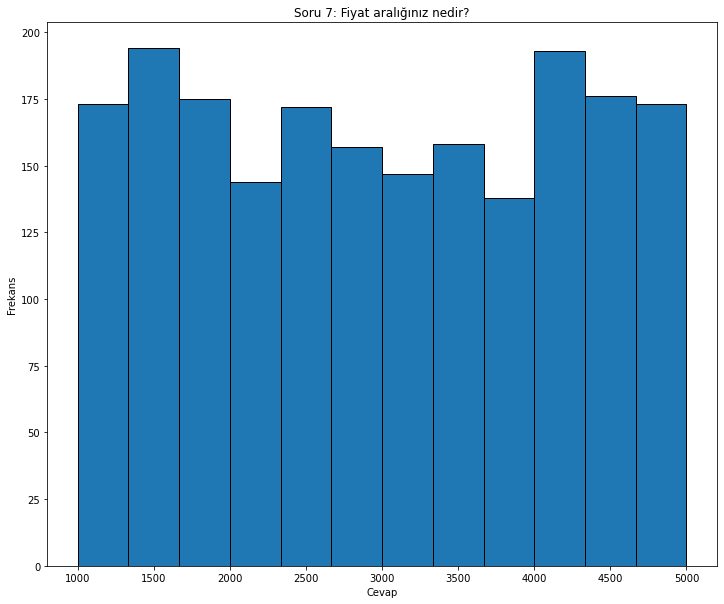

In [50]:
import matplotlib.pyplot as plt

# Sorular
sorular = ["Soru 1: Genelde kaçta uyursun?",
           "Soru 2: Ortalaman kaç?",
           "Soru 3: Sigara kullanıyor musun?",
           "Soru 4: Evcil hayvanın var mı?",
           "Soru 5: Evinizin lüks olması ne kadar önemli?",
           "Soru 6: Evi kaç aylığına kiralamak istiyorsunuz?",
           "Soru 7: Fiyat aralığınız nedir?"]

# Cevaplar listesi
cevaplar = answers_list

# Her bir soru için ayrı bir histogram oluşturma
for i, soru in enumerate(sorular):
    cevap_listesi = [cevap[soru] for cevap in cevaplar if soru in cevap]

    # Histogram oluşturma
    plt.figure(figsize=(12, 10))  # Grafik boyutunu ayarla #18,16
    plt.hist(cevap_listesi, bins='auto', edgecolor='black')
    plt.xlabel("Cevap")
    plt.ylabel("Frekans")
    plt.title(soru)

    plt.show()

In [ ]:
short_feature_vector_list = feature_vector_list[:100]
short_predicted_labels = predicted_labels[:100]
for enum_num,feature_vector in enumerate(short_feature_vector_list):
    #np.insert(feature_vector,len(feature_vector),short_predicted_labels[enum_num])
    feature_vector = np.append(feature_vector,short_predicted_labels[enum_num]).astype('object')
    short_feature_vector_list[enum_num] = feature_vector


In [ ]:
short_feature_vector_list